**Welcome to my Kernel**

In this dataset, we have to predict default payment of credit and to find which variables are the strongest predictors of default payment? and How does the probability of default payment vary by categories of different demographic variables?

So, first we will see what are features and how many features are available to predict default payment.

There are 25 variables:

**1. ID:** ID of each client <br>
**2. LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit<br>
**3. SEX:** Gender (1=male, 2=female)<br>
**4. EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
**5. MARRIAGE:** Marital status (1=married, 2=single, 3=others)<br>
**6. AGE:** Age in years<br>
**7. PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)<br>
**8. PAY_2:** Repayment status in August, 2005 (scale same as above)<br>
**9. PAY_3:** Repayment status in July, 2005 (scale same as above)<br>
**10. PAY_4:** Repayment status in June, 2005 (scale same as above)<br>
**11. PAY_5:** Repayment status in May, 2005 (scale same as above)<br>
**12. PAY_6:** Repayment status in April, 2005 (scale same as above)<br>
**13. BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)<br>
**14. BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)<br>
**15. BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)<br>
**16. BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)<br>
**17. BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)<br>
**18. BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)<br>
**19. PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)<br>
**20. PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)<br>
**21. PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)<br>
**22. PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)<br>
**23. PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)<br>
**24. PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)<br>
**25. default.payment.next.month:** Default payment (1=yes, 0=no)<br>

Now, we know about the overall structure of a dataset . So let's apply some of the steps that we should generally do while applying machine learning models.

**STEP 1 : IMPORTING LIBRARIES**

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve as curves
from time import time
import os
# print(os.listdir("../input"))
from IPython.display import display
# Any results you write to the current directory are saved as output.

In [46]:
dataset = pd.read_csv('/Users/nic/Documents/学校论文/代码/datasets/UCI_Credit_Card.csv')

In [47]:
# Now lets see how the data looks like
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [48]:
# Checking the last few entries of dataset to see the distribution of data
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


**Step 2 : Preprocessing & Cleaning of Data**

In [49]:
dataset['PAY_0'].drop_duplicates()

0       2
1      -1
2       0
9      -2
13      1
129     3
360     4
649     8
2324    7
3537    5
4801    6
Name: PAY_0, dtype: int64

Means there are 30,000 entries with 25 columns

In [50]:
# Checking the object type of all the columns to see if there is not a object type mismatch in any column 
print(dataset.dtypes)

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


From the above output it is clear that there is no object type mismatch in any column.

In [51]:
#Checking the number of Null entries in the data columnwise.
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**STEP 3. Data Visualization & Exploratory Data Analysis**

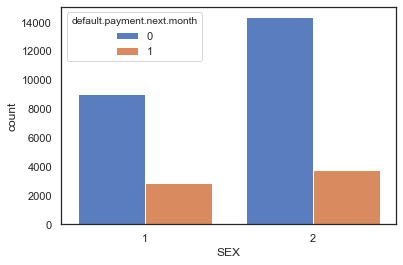

In [52]:
# Checking the number of counts of defaulters and non defaulters sexwise
g=sns.countplot(x="SEX", data=dataset,hue="default.payment.next.month", palette="muted")

It is evident from the above output that females have overall less default payments wrt males

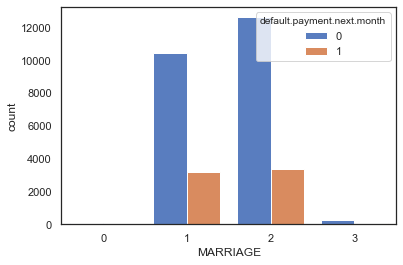

In [53]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="default.payment.next.month", palette="muted")

From the above plot it is clear that those people who have marital status single have less default payment wrt married status people.

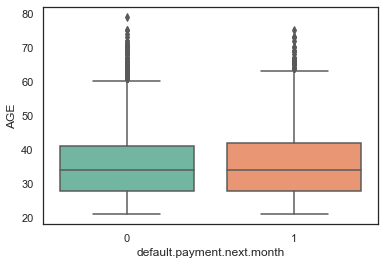

In [54]:
sns.boxplot(x='default.payment.next.month',y='AGE',data=dataset,palette='Set2')


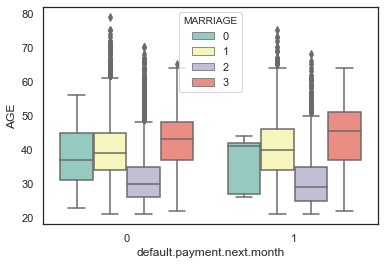

In [55]:
sns.boxplot(x='default.payment.next.month',hue='MARRIAGE', y='AGE',data=dataset,palette="Set3")

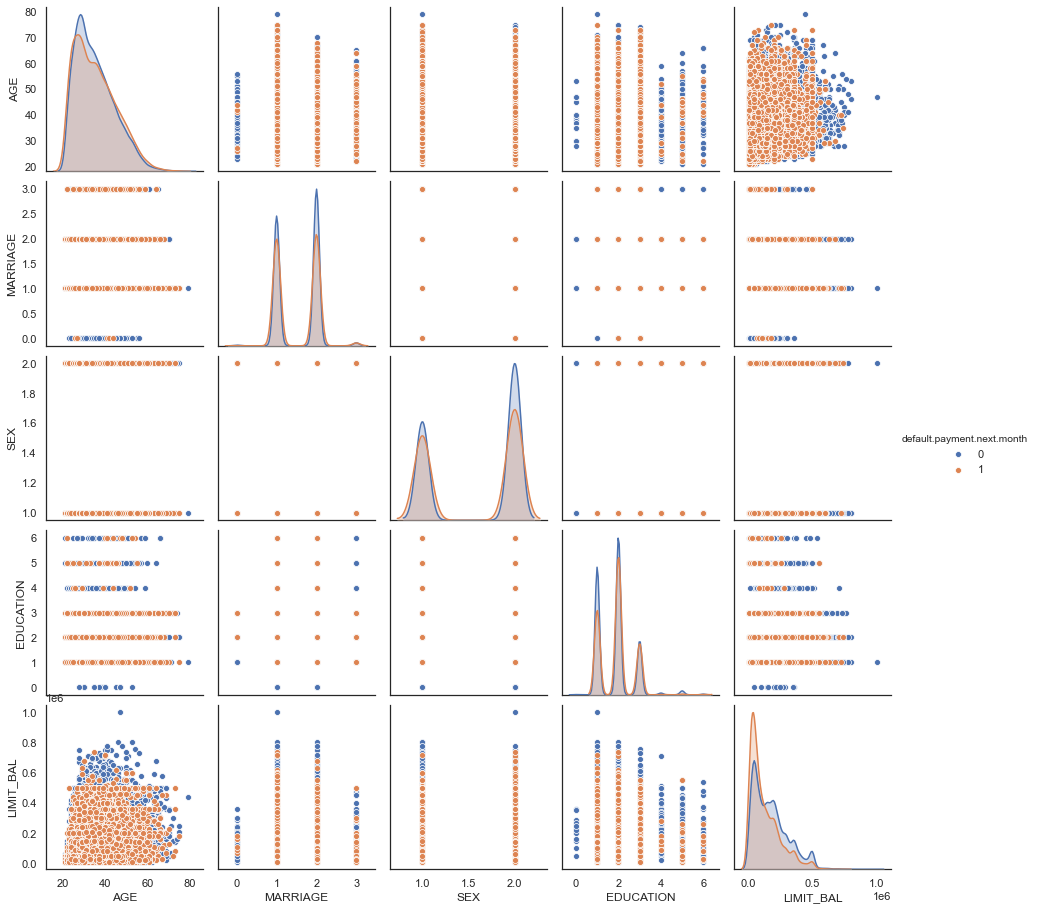

In [56]:
sns.pairplot(dataset, hue = 'default.payment.next.month', vars = ['AGE', 'MARRIAGE', 'SEX', 'EDUCATION', 'LIMIT_BAL'] )

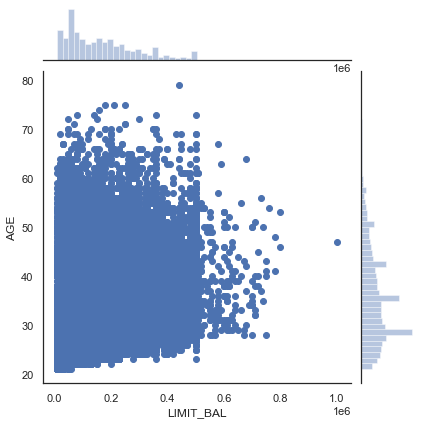

In [57]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset)

**Distribution of Male and Female according to their age**

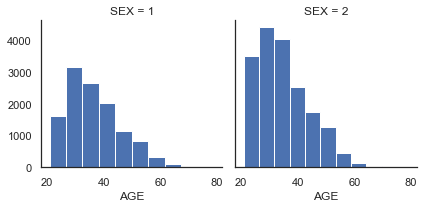

In [58]:
g = sns.FacetGrid(data=dataset,col='SEX')
g.map(plt.hist,'AGE')

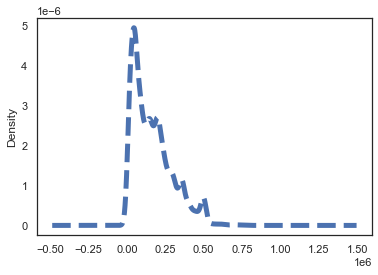

In [59]:
dataset['LIMIT_BAL'].plot.density(lw=5,ls='--')

**STEP 4. Finding Correlation**

In [60]:
X = dataset.drop(['default.payment.next.month'],axis=1)
y = dataset['default.payment.next.month']

/Users/nic/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nic/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nic/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nic/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nic/Library/Python/3.7/lib/python/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nic/Library/Python/3.7/lib/python/site-packages/matplotlib

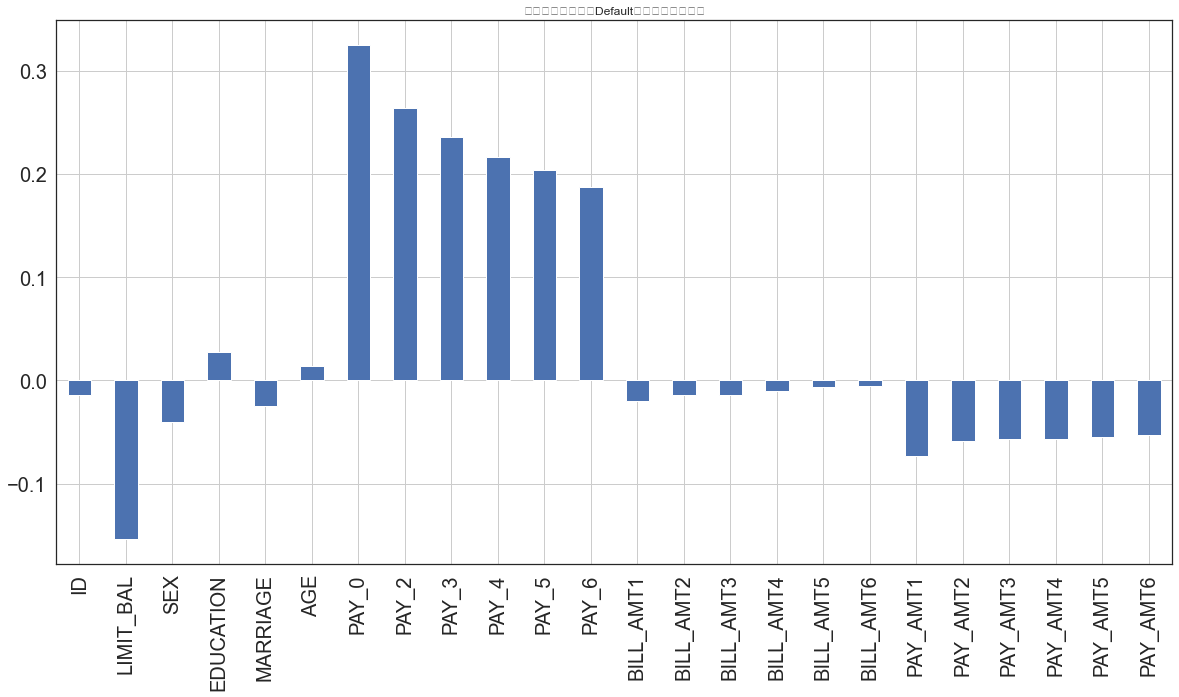

In [62]:
X.corrwith(dataset['default.payment.next.month']).plot.bar(
        figsize = (20, 10), title = "特征值与标签值（Default）之间的相关系数", fontsize = 20,
        rot = 90, grid = True)

It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

In [18]:
dataset2 = dataset.drop(columns = ['default.payment.next.month'])

In [19]:
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

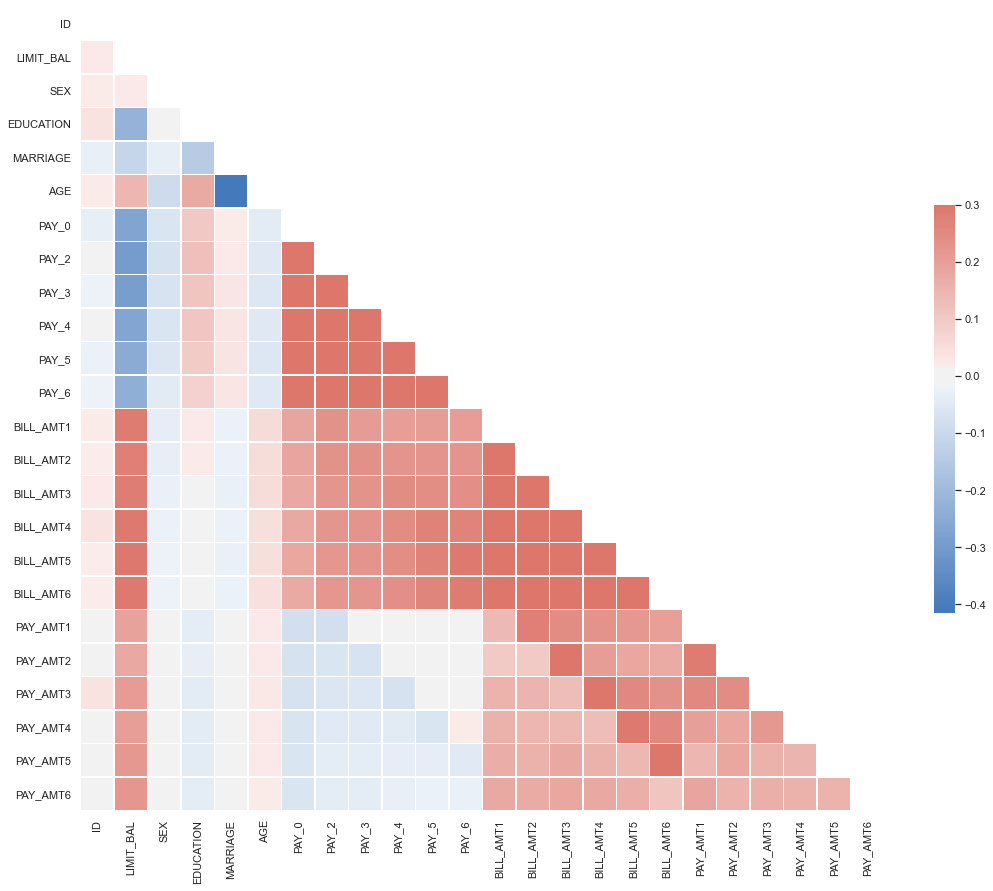

In [20]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**STEP 5 : SPLITTING DATA INTO TRAINING AND TESTING SET** <br>

The training dataset and test dataset must be similar, usually have the same predictors or variables. They differ on the observations and specific values in the variables. If you fit the model on the training dataset, then you implicitly minimize error or find correct responses. The fitted model provides a good prediction on the training dataset. Then you test the model on the test dataset. If the model predicts good also on the test dataset, you have more confidence. You have more confidence since the test dataset is similar to the training dataset, but not the same nor seen by the model. It means the model transfers prediction or learning in real sense.

So,by splitting dataset into training and testing subset, we can efficiently measure our trained model since it never sees testing data before.Thus it's possible to prevent overfitting.

I am just splitting dataset into 20% of test data and remaining 80% will used for training the model.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**STEP 6: Normalizing the data : Feature Scaling** <br>

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, 

In [22]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [23]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

**STEP 7: Applying Machine Learning Models**

In [24]:
from sklearn.ensemble  import AdaBoostClassifier
adaboost =AdaBoostClassifier()

start = time()
adaboost.fit(X_train_scaled, y_train)
end = time()
train_time_ada=end-start

In [25]:
y_pred = adaboost.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Adaboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost,0.823333,0.696517,0.323824,0.442105,0.642456


In [27]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
start = time()

xgb_classifier.fit(X_train_scaled, y_train,verbose=True)
end=time()
train_time_xgb=end-start

/Users/nic/Library/Python/3.7/lib/python/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:12:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
y_pred = xgb_classifier.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,sort=True)
results

,Accuracy,F1 Score,Model,Precision,ROC,Recall
0,0.823333,0.442105,Adaboost,0.696517,0.642456,0.323824
0,0.791167,0.248350,XGboost,0.559459,0.562470,0.159599


In [29]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=1.0)  # 默认使用L2正则化避免过拟合，C=1.0表示正则力度(超参数，可以调参调优)
lg.fit(X_train_scaled, y_train)
end=time()
train_time_sgd=end-start

/Library/Python/3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
y_pred = lg.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['LR', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,sort=True)
results

,Accuracy,F1 Score,Model,Precision,ROC,Recall
0,0.823333,0.442105,Adaboost,0.696517,0.642456,0.323824
0,0.791167,0.248350,XGboost,0.559459,0.562470,0.159599
0,0.821167,0.406198,LR,0.719608,0.626277,0.282961


In [35]:
dataset_desc = dataset.describe().T
# dataset_desc.to_excel('/Users/nic/Documents/学校论文/代码/datasets/dataset_desc.xlsx', index=False)
dataset_desc

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier(max_iter=1000)
start = time()
sgd.fit(X_train_scaled, y_train)
end=time()
train_time_sgd=end-start

In [ ]:
y_pred = sgd.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SGD 1000 iter', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,sort=True)
results

In [ ]:
from sklearn  import ensemble
gboost =ensemble.GradientBoostingClassifier()
start = time()
gboost.fit(X_train_scaled, y_train)
end=time()
train_time_g=end-start

In [ ]:
y_pred = gboost.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Gboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,sort=True)
results

**Applying Random Forest with 100 trees and criterion entropy**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 47, 
                                    criterion = 'entropy',n_estimators=100)
start = time()
classifier.fit(X_train_scaled, y_train)
end=time()
train_time_r100=end-start

In [ ]:
y_pred_r = classifier.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_r)
acc = accuracy_score(y_test, y_pred_r)
prec = precision_score(y_test, y_pred_r)
rec = recall_score(y_test, y_pred_r)
f1 = f1_score(y_test, y_pred_r)

model_results = pd.DataFrame([['Random_forest_ent100 ', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

In [ ]:
from sklearn.svm import SVC 

svc_model = SVC(kernel='rbf', gamma=0.1,C=100)

start = time()
svc_model.fit(X_train_scaled, y_train)
end=time()
train_time_svc=end-start

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_svc = svc_model.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

model_results = pd.DataFrame([['SVC ', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)

start = time()
knn.fit(X_train_scaled, y_train)
end=time()
train_time_knn=end-start

In [ ]:
y_pred_g = knn.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_g)
acc = accuracy_score(y_test, y_pred_g)
prec = precision_score(y_test, y_pred_g)
rec = recall_score(y_test, y_pred_g)
f1 = f1_score(y_test, y_pred_g)

model_results = pd.DataFrame([['KNN 7', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

**STEP 8 : ANALYZING AND COMPARING  TRAINING  TIME OF MACHINE LEARNING MODELS**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Adaboost','XGBoost','SGD', 'SVC', 'GBOOST', 'Random forest', 'KNN7']
Train_Time = [
    train_time_ada,
    train_time_xgb,
    train_time_sgd,
    train_time_svc,
    train_time_g,
    train_time_r100,
    
    train_time_knn
]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=8, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

As from the above graph it is evident that Adaboost and XGboost have taken very less time to train in comparison to other models where as SVC has taken maximum time the reason may be we have passed some crucial parameters to SVC.

**STEP 9. Model Optimization**

Random search outperformed grid search on this dataset across every number of iterations. Also random search seemed to converge to an optimum more quickly than grid search, which means random search with fewer iterations is comparable to grid search with more iterations.

In highdimensional parameter space, grid search would perform worse with the same iterations because points become more sparse. Also it is common that one of the hyperparameters is unimportant to finding the optimal hyperparameters, in which case grid search wastes a lot of iterations where as random search does not waste any iteration.

Now we will optimize models accuracy  using Randomsearch cv.As shown in above table Adaboost performs best in this dataset. So we will try to further optimize adaboost and SVC by fine tuning its hyperparameters.

**Parameter Tuning using random Searchcv**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
param_dist = {
      'n_estimators': [10,20,50,100,120,150,200],  
    'random_state':[47],
        'learning_rate':[0.1,0.01,0.001,0.0001]}

# run randomized search
n_iter_search =20
random_search = RandomizedSearchCV(adaboost, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)


random_search.fit(X_train_scaled,y_train)

Now, lets see what are the best parameters of adaboost

In [ ]:
random_search.best_params_

In [ ]:
y_pred_ada = random_search.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_ada)
acc = accuracy_score(y_test, y_pred_ada)
prec = precision_score(y_test, y_pred_ada)
rec = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)

results_tuned = pd.DataFrame([['Adaboost Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_tuned

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV, cross_val_score
param_dist ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]} 

# run randomized search
n_iter_search =10
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)


random_search.fit(X_train_scaled,y_train)

In [ ]:
random_search.best_params_

In [ ]:
y_pred_xgb = random_search.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

model =  pd.DataFrame([['XGBoost Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_tuned = results_tuned.append(model, ignore_index = True)
results_tuned

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV, cross_val_score
param_dist ={'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]} 

# run randomized search
n_iter_search =8
random_search = RandomizedSearchCV(sgd, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)


random_search.fit(X_train_scaled,y_train)

In [ ]:
random_search.best_params_

In [ ]:
y_pred_sgd = random_search.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)

model_results = pd.DataFrame([['SGD Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_tuned = results_tuned.append(model_results, ignore_index = True)
results_tuned

That's great all the metrics parameters accuracy, F1 score Precision, ROC, Recall iof the  three  models adaboost,XGBoost and SGD are optimized now. Further we can also try some other combination of parameters to see if there will be further improvement or not. 

**Plotting of ROC Curve**

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble  import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Adaboost',
    'model': AdaBoostClassifier(random_state=47,n_estimators=120,learning_rate=0.01),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
    {
    'label': 'XGBoost',
    'model': XGBClassifier(),
},
    {
    'label': 'SGD',
    'model': SGDClassifier(max_iter=1000,penalty= 'l2', n_jobs= -1, loss= 'log', alpha=0.0001) ,
},
    
    {
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors = 5),
},
    {
    'label': 'Randomforest',
    'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=47, verbose=0, warm_start=False),        
    }
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = np.arange(1, 250, 2)
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(AdaBoostClassifier(), 
                                             X_train_scaled, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With ADABOOST")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


**Interpretation of the Validation Curve**

if the number of trees are around 10, then the  model suffers from high bias. Two scores are quite close,but both the scores are too far from acceptable level so I think it's a high bias problem.In other words, the model is underfitting. 

At a maximun number of trees of 250, model suffers from high variance since training score is 0.82 but validation score is about 0.81.In other words, a model is overfitting. Again, the data points suggest a sort of graceful curve. However, our model uses a very complex curve to get as close to every data point as possible. Consequently, a model with high variance has very low bias because it makes little to no assumption about the data. In fact, it adapts too much to the data.

As we see from the curve, max trees of around  30 to 40 best generalizes the unseen data. As max trees increases, bias becomes lower and variance becomes higher. We should keep the balance between the two. Just after  30 to 40 number of trees training score increase upwards and validation score starts to goes down, so I it begins to suffer from overfitting. So that's why any number of trees between 30 and 40  should be a good choice.

**Conclusion**

So, we have seen that accuracy of tuned Adaboost is around 82.95% and also achieved decent  score of all other performance metric such as F1 score, Precision, ROC and Recall.

Further we can also perform model optimization by using Randomsearch or Gridsearch to find the appropriate parameters to increase the accuracy of the models.

I think all these three models if properly tuned will perform better.

Apart from that, your valuable suggestions for further improvement and optimization are always welcome from my side do comment !!